# Recession Predictor Part 1

The United States as of today (October, 2019) has experienced the longest expansion cycle, yet the there are constant talks in the news about an impending recession. Yes, there are signs, such as the recent yield curve inversion, the market corrections in 2018 & 2019, etc. Recessions happen every 10 years or so, are we overdue for one?

Explain other methodologies used to predict recession.
*Federal Reserve
*Rabobank
*Blah
*Blah

Explain what I'm trying to do, not only to look at recession as a binary as NBER describes it, but also to predict future GDP in the [] futre terms.

For decision variable, we will two methods:
1. Predicting GDP growth.
2. Predicting probability of a recession.

## Feature Selection

Feature selection is important, as the rule of "garbage in, garbage out" applies. While there are techniques and algorithms to systematically select variables, this is outside the scope of this analysis.Instead, we will rely on domain knowledge to quickly select desired feastures. The following factors are considered when selecting input indicator variables:
* Having sufficient data, as recessions are rare occurances.
* Having forward predictive power, which means inflection changes should lead or occur simultaneously as inflection changes in GDP.
* Represent various aspects and mechanisms of the economy, such as a risk free benchmark, or inflation.
* Avoid composite models or indices. The goal is to construct our own model.

For the GDP decision variable:
* [**Real Gross Domestic Product**](https://fred.stlouisfed.org/series/GDPC1)- Inflation adjusted value of goods and services produced in a year.

For equities, the following variables are considered:
* [S&P 500](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC)- Weighted stock index of 500 companies listed on US exchanges with the largest market cap.
* [S&P 500 Cyclically Adjusted PE Ratio](https://www.quandl.com/data/MULTPL/SHILLER_PE_RATIO_MONTH-Shiller-PE-Ratio-by-Month) [(info)](https://www.investopedia.com/terms/c/cape-ratio.asp)- Normalizes PE ratio fluctuations over 10 year inflation-adjusted earnings. This indicator is used to gauge whether the equities market is over or under-valued.
* [**Nonfinancial Corporate Debt as Percentage of Equity**](https://fred.stlouisfed.org/series/NCBCMDPMVCE)- Contains companies not in the S&P 500. Although this indicator excludes [% of GDP](), valuations of financial and noncorporate companies 

For bonds, the following variables are considered: 
* [10 Year Constant Maturity Minus 3 Month Treasuries Yield Spread](https://fred.stlouisfed.org/series/T10Y3M)- Federal Reserve's main methodology. Financial institutions borrow at low rates short term, to lend at high rates long term. High spread means  The data only goes back to 1982, which is not enough to train this model.
* [**10 Year Constant Maturity Minus 3 Month Treasuries Secondary Market Yield Spread**](https://fred.stlouisfed.org/series/TB3MS)- Makes up for the lack of data in the primary market. Primary and secondary market spreads are very close today, due to electronic trading. However, the spread has been higher historically. This discrepancy is mostly caused by information inefficiency. Federal Reserve also [manipulates rates to some degree](https://fredblog.stlouisfed.org/2017/02/lets-do-the-twist/). Since this model relies on multiple input indicators, this flaw can be overlooked. 
* [10 Year Treasuries Constant Maturity Rate](https://fred.stlouisfed.org/series/DGS10)- Long term treasuries usually reflect investor sentiment regarding long term economic growth, with higher yield . This does not provide strong evidence of liquidity.
* 3 Months Outstanding Repo [(info)](http://law.emory.edu/ecgar/content/volume-5/issue-2/essays/repo-recession-financial-regulation.html)- Hard to find on the web. Before the Great Recession, investment banks used short term repo to inject liquidity to stay afloat. Uptick in short term repo may indicate credit crunch. FRED only has records of contracts with itself as a participant, leaving out the majority of transactions.

For inflation, the following indicators are considered:
* [**Consumer Price Index for Urban Consumers**](https://fred.stlouisfed.org/series/CPIAUCSL) [(info)](https://www.bls.gov/opub/btn/volume-3/why-does-bls-provide-both-the-cpi-w-and-cpi-u.htm)- Price inflation covering 88% of Americans, calculated from expenditures. Uses a survey to calculate the basket of goods and services. Basket is updated every 2 years. Selected due to difficulty quantifying intangible traits such as quality.
* [Chained Consumper Price Index for Urban Consumers](https://fred.stlouisfed.org/series/SUUR0000SA0) [(info)](https://www.brookings.edu/blog/up-front/2017/12/07/the-hutchins-center-explains-the-chained-cpi/)- Lacking long term data. Similar to CPI-U, but considers substitution purchases, and weights the changes every month.

For employment, the following indicators are considered:
* [Labor Participation Rate](https://fred.stlouisfed.org/series/CIVPART)- Percent of population over 16 actively seeking or engaged in employment. Too macro driven, such as women participation in the workforce, or retirement of Baby Boomers.
* [**Total Nonfarm Payroll**](https://fred.stlouisfed.org/series/PAYEMS)- Accounts for 80% of workers who contribute to GDP, excluding propritors, unpaid volunteers, or farm workers.
* [Wage Growth](https://fred.stlouisfed.org/series/CES0500000003)- Lack of long term data.

Lastly, the following indicators are not placed in any categories above, but are included because of their predictive power.
* [**Real Private Gross Investment**](https://fred.stlouisfed.org/series/GPDIC1)- Investment represents expenditure on capital goods and residential properties. Provides an indicator for future productivity and GDP growth. Also a strong sign of economic recovery.

The following indicators were considered, but ultimately dismissed.
* [Purchaing Managers' Index](https://www.instituteforsupplymanagement.org/ismreport/mfgrob.cfm?SSO=1)- Locked behind paywall. A survey of supply chain professionals in 19 primary industries.
* [Composite Index of Leading Indicators](https://www.conference-board.org/data/bcicountry.cfm?cid=1) [(info)](https://www.investopedia.com/terms/c/cili.asp)- Locked behind paywall. A composite index of 10 indicators.
* [Consumer Confidence Index](https://www.conference-board.org/data/consumerconfidence.cfm)- Locked behind paywall. A survey of consumer purchases and sentiments.
* [VIX Volativity Index](https://fred.stlouisfed.org/series/VIXCLS)- Describes the volatility, not the direction, of stocks. Also does not describe economic strength.
* [Effective Federal Funds Rate](https://fred.stlouisfed.org/series/FEDFUNDS)- Not an organic indicator of market conditions. Different FED chairs have different doctrines. The FED was fighting inflation in the 70s, deregulation in the 80s, inflation targeting in the 90s & 2000s, then quantitative easing in the 2010s. 
* Change in working hours- Symptom, not sign, of economic strength.
* [Personal Savings Rate](https://fred.stlouisfed.org/series/PSAVERT)- Too macro driven, such as women entering workforce, or retirement of Baby Boomers.
* Incremental Capital Outputs Ratio- Hard to find on the web. Calculates how much additional capital investment is needed to create growth.

## Data Preparation

First, import the necessary packages.

In [1]:
import fredapi
import numpy as np
import pandas as pd
import scipy as sp
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import acf
from copy import deepcopy

#### Import FRED Data

To import FRED data, we need an API key. API key can be requested [here](https://research.stlouisfed.org/docs/api/fred/).

In [2]:
f = fredapi.Fred(api_key='8b91217446b6307d20cb5e4fcfba70eb') # remove API when done

Data returned by fredapi module are in "series" format. We need to convert them to "dataframe" format.

We will also rename the columns so the data become easier to manipulate.

In [3]:
# monthly data.
tbill_3m = f.get_series('TB3MS').to_frame().reset_index().rename(columns={'index':'date', 0:'tbill_3m'})
tbill_10y = f.get_series('GS10').to_frame().reset_index().rename(columns={'index':'date', 0:'tbill_10y'})
cpiu = f.get_series('CPIAUCSL').to_frame().reset_index().rename(columns={'index':'date', 0:'cpiu'})
payroll = f.get_series('PAYEMS').to_frame().reset_index().rename(columns={'index':'date', 0:'payroll'})
# quarterly data
dtoe = f.get_series('NCBCMDPMVCE').to_frame().reset_index().rename(columns={'index':'date', 0:'dtoe'})
pinvest = f.get_series('GPDIC1').to_frame().reset_index().rename(columns={'index':'date', 0:'pinvest'})
gdp = f.get_series('GDPC1').to_frame().reset_index().rename(columns={'index':'date', 0:'gdp'})

In [4]:
print(type(tbill_3m))

<class 'pandas.core.frame.DataFrame'>


#### Setting Start Date

Note that all variables have different startig dates, we need to standardize the starting date, doing so removes all of the null values.

In [5]:
print(tbill_3m.head(1))
print(tbill_10y.head(1))
print(cpiu.head(1))
print(payroll.head(1))
print(dtoe.head(1))
print(pinvest.head(1))
print(gdp.head(1))

        date  tbill_3m
0 1934-01-01      0.72
        date  tbill_10y
0 1953-04-01       2.83
        date   cpiu
0 1947-01-01  21.48
        date  payroll
0 1939-01-01  29923.0
        date       dtoe
0 1945-10-01  43.061963
        date  pinvest
0 1947-01-01  218.091
        date       gdp
0 1947-01-01  2033.061


For consistency, we will set the starting date at 1953/4/1.

In [6]:
start_date = pd.to_datetime('1953, 4')
tbill_3m = tbill_3m[tbill_3m.iloc[:,0] >= start_date]
tbill_10y = tbill_10y[tbill_10y.iloc[:,0] >= start_date]
cpiu = cpiu[cpiu.iloc[:,0] >= start_date]
payroll = payroll[payroll.iloc[:,0] >= start_date]
pinvest = pinvest[pinvest.iloc[:,0] >= start_date]
dtoe = dtoe[dtoe.iloc[:,0] >= start_date]
gdp = gdp[gdp.iloc[:,0] >= start_date]

#### Deriving Treasury Spread

FRED have a graph, not series of data on [10 year - 3 month spread](https://fred.stlouisfed.org/graph/?g=oGg). We have to creat our own.

In [7]:
tbill = [tbill_10y, tbill_3m]
tbill = reduce(lambda left,right: pd.merge(left,right,on='date'), tbill)
tbill = tbill.set_index('date')
tbill['tbill_10y'] = tbill.loc[:,'tbill_10y'] - tbill.loc[:,'tbill_3m']
tbill = tbill.drop('tbill_3m', axis=1)
tbill = tbill.rename(columns={'tbill_10y':'tbill'})

#### Converting Quarterly to Monthly Data and Null Value Interpolation

To convert quarterly to monthly data, we will resample the data.

In [8]:
dtoe = dtoe.set_index('date').resample('MS').asfreq()
pinvest = pinvest.set_index('date').resample('MS').asfreq()
gdp = gdp.set_index('date').resample('MS').asfreq()

In [9]:
gdp.head(2)

,gdp
date,
1953-04-01,2718.709
1953-05-01,NaN


We will use [cublic spline interpolation](https://columbiaeconomics.com/2010/01/20/how-economists-convert-quarterly-data-into-monthly-cubic-spline-interpolation/), a technique commonly used by economists. Cubic spline has better smoothing over quadratic interpolation.

Interpolation converts data to series. We need to convert back to DataFrame type.

In [10]:
gdp = gdp['gdp'].interpolate(method='spline', order=3).to_frame().reset_index()
dtoe = dtoe['dtoe'].interpolate(method='spline', order=3).to_frame().reset_index()
pinvest = pinvest['pinvest'].interpolate(method='spline', order=3).to_frame().reset_index()

## Preliminary Analysis

Join all variables into the one dataframe.

In [11]:
data = [tbill, cpiu, payroll, dtoe, pinvest, gdp]
data = reduce(lambda left,right: pd.merge(left,right,on='date'), data)
data = data.set_index('date')

data.tail(2)

,tbill,cpiu,payroll,dtoe,pinvest,gdp
date,,,,,,
2019-03-01,0.17,254.148,150796.0,31.722101,3451.579485,18995.539134
2019-04-01,0.15,254.958,151012.0,32.878620,3424.653000,19021.860000


In [12]:
data.isnull().sum()

tbill      0
cpiu       0
payroll    0
dtoe       0
pinvest    0
gdp        0
dtype: int64

In [13]:
data.describe()

,tbill,cpiu,payroll,dtoe,pinvest,gdp
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,1.477011,116.719218,98634.532156,53.329095,1389.299122,9204.323371
std,1.163736,75.631481,31731.058247,19.547286,925.362634,4910.707601
min,-2.650000,26.690000,48826.000000,27.607288,258.119250,2648.605266
25%,0.620000,37.300000,70792.000000,37.836569,586.052264,4938.967907
50%,1.450000,109.500000,99121.000000,45.748693,1143.195032,8185.303000
75%,2.410000,181.200000,130666.000000,67.745365,2223.919596,13559.032000
max,4.420000,254.958000,151012.000000,103.214216,3481.088000,19021.860000


C:\ProgramData\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


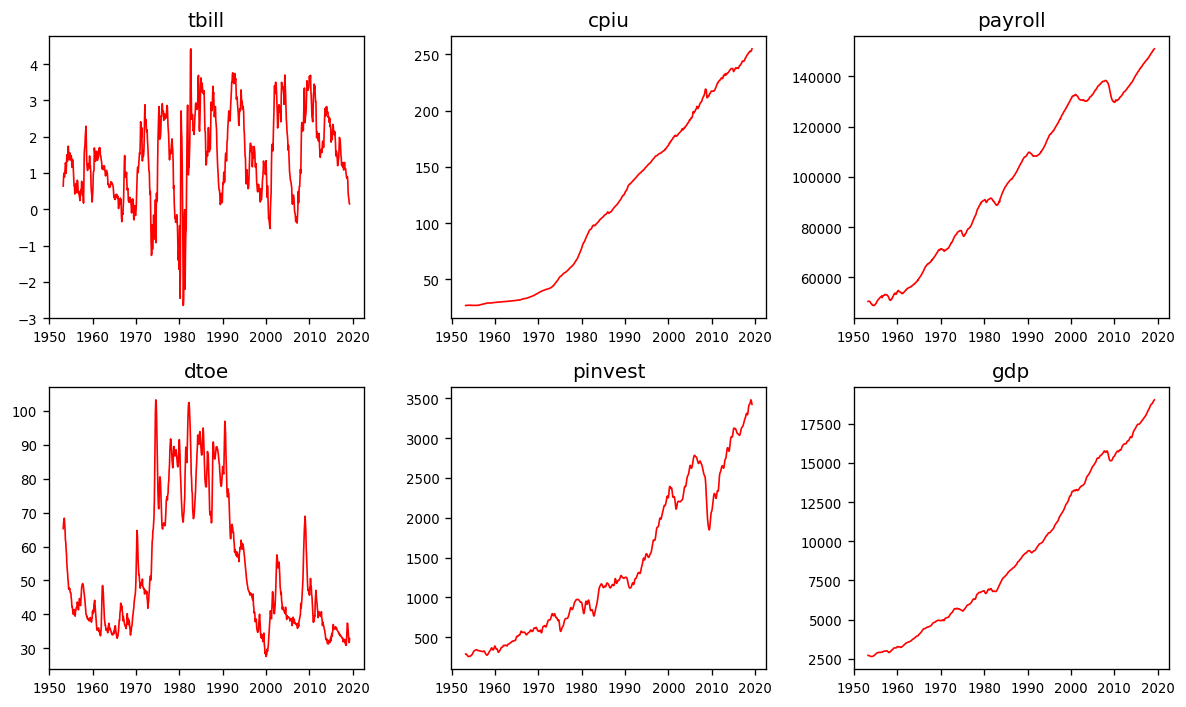

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, dpi=120, figsize=(10,6))
for col, ax in enumerate(axes.flatten()):
    ax.plot(data[data.columns[col]], color='red', linewidth=1)
    ax.set_title(data.columns[col])
    ax.tick_params(labelsize=8)
    
plt.tight_layout()

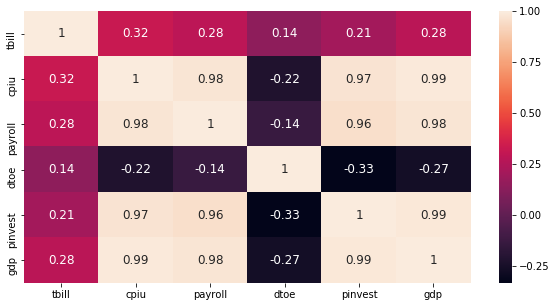

In [15]:
plt.figure(figsize = (10,5))
ax = sb.heatmap(data.corr(), xticklabels=data.columns.values, yticklabels=data.columns.values, annot=True, annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

CPIU, PAYROLL, PINVEST, and GDP are highly correlated. This could create problems of multicollinearity. Multicollinearity reduces the statistical significance of the variables, making it difficult to pinpoint which variable is responsible for changes in GDP.

Going back to the criteria set at the beginning, CPIU and PAYROLL will be removed as PINVEST has the earliest inflection point.

In [16]:
data = data.drop(['cpiu', 'payroll'], axis=1)

#### Model Selection

For dealing with multiple variables, a vector autoregression (VAR) model is right for the job.

VAR assumes Granger causality relationship between all of the variables, in other words, all variables are dependent variables on each other. We can verify if we should reject this hypothesis.

#### Splitting Training and Validation Datasets

#### Test for Autocorrelation

GDP is highly autocorrelated. While this feature can allow a strong generalization of GDP trend (2% year-over-year growth), we are interested in the short term fluctuations.

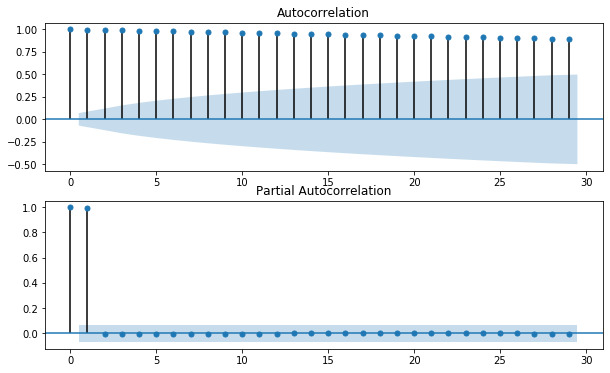

In [17]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0] = plot_acf(data.gdp, ax=ax[0])
ax[1] = plot_pacf(data.gdp, ax=ax[1])

#### Test for Stationarity

It is also important for all data to be stationary, meaning the mean and variance do not change overtime. The primary feature to eliminate is trend, for example: GDP increases steadily over the years, the mean increases as time increases, and so does the variance. At the current trend, as time approaches infinity, so does the mean and variance. Many data models do not deal with changing mean and variance very well.

In [18]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        
    def ADF_Stationarity_Test(self, timeseries):
        adfTest = adfuller(timeseries, autolag='BIC')
        self.pValue = adfTest[1]
        
        if (self.pValue < self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags','# Observations'])
        dfResults['Critical Value 5%'] = adfTest[4]['5%']

        print('Augmented Dickey-Fuller Test Results:')
        print(dfResults)

In [19]:
sTest = StationarityTests()

for var in data:
    sTest.ADF_Stationarity_Test(data[var])
    print('Is {} series stationary? {}'.format(var, sTest.isStationary))
    print('\n')

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -4.862684
P-Value                 0.000041
# Lags                  3.000000
# Observations        789.000000
Critical Value 5%      -2.865210
dtype: float64
Is tbill series stationary? True


Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.121154
P-Value                 0.706563
# Lags                 21.000000
# Observations        771.000000
Critical Value 5%      -2.865296
dtype: float64
Is dtoe series stationary? False


Augmented Dickey-Fuller Test Results:
ADF Test Statistic      0.618297
P-Value                 0.988058
# Lags                 12.000000
# Observations        780.000000
Critical Value 5%      -2.865253
dtype: float64
Is pinvest series stationary? False


Augmented Dickey-Fuller Test Results:
ADF Test Statistic      2.634043
P-Value                 0.999081
# Lags                 19.000000
# Observations        773.000000
Critical Value 5%      -2.865286
dtype: float64
Is gdp series statio

#### Data Transformation

To make our data stationary, we will take the first difference of log of month(t) and its lag value:
log((y_t) - log(y_(t-1)))

But first, we need to transform *tbill* into positive integers, as log cannot process 0 and negative values.

In [20]:
tbill_trans_var = 1 - data['tbill'].min()
data['tbill'] += tbill_trans_var
data_trans = np.log(data).diff().dropna()
data['tbill'] -= tbill_trans_var

In [21]:
test_periods = 12
train, test = data[0:-test_periods], data[-test_periods:]
train_trans = data_trans[0:-test_periods]
train_trans.tail()

,tbill,dtoe,pinvest,gdp
date,,,,
2017-12-01,-0.008421,-0.005727,0.005696,0.001879
2018-01-01,0.018849,0.006289,0.002935,0.002185
2018-02-01,0.024591,-0.020837,-0.002544,0.002689
2018-03-01,-0.030835,-0.008071,-0.002803,0.002788
2018-04-01,-0.006283,0.027605,0.000730,0.003157


But due to the fact that logarithmic functions cannot deal with 0, we must find an alternative.

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


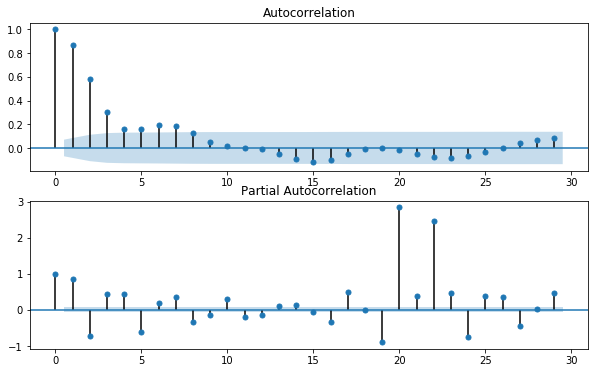

In [22]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0] = plot_acf(train_trans.gdp, ax=ax[0])
ax[1] = plot_pacf(train_trans.gdp, ax=ax[1])

In [23]:
for var in train:
    sTest.ADF_Stationarity_Test(train_trans[var])
    print("Is {} series stationary? {}".format(var, sTest.isStationary))
    print('\n')

Augmented Dickey-Fuller Test Results:
ADF Test Statistic   -6.605121e+00
P-Value               6.586160e-09
# Lags                1.500000e+01
# Observations        7.640000e+02
Critical Value 5%    -2.865330e+00
dtype: float64
Is tbill series stationary? True


Augmented Dickey-Fuller Test Results:
ADF Test Statistic   -7.879617e+00
P-Value               4.741314e-12
# Lags                2.000000e+01
# Observations        7.590000e+02
Critical Value 5%    -2.865355e+00
dtype: float64
Is dtoe series stationary? True


Augmented Dickey-Fuller Test Results:
ADF Test Statistic   -8.792095e+00
P-Value               2.226341e-14
# Lags                7.000000e+00
# Observations        7.720000e+02
Critical Value 5%    -2.865291e+00
dtype: float64
Is pinvest series stationary? True


Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -5.620669
P-Value                 0.000001
# Lags                 16.000000
# Observations        763.000000
Critical Value 5%      -2.865335
dtype: 

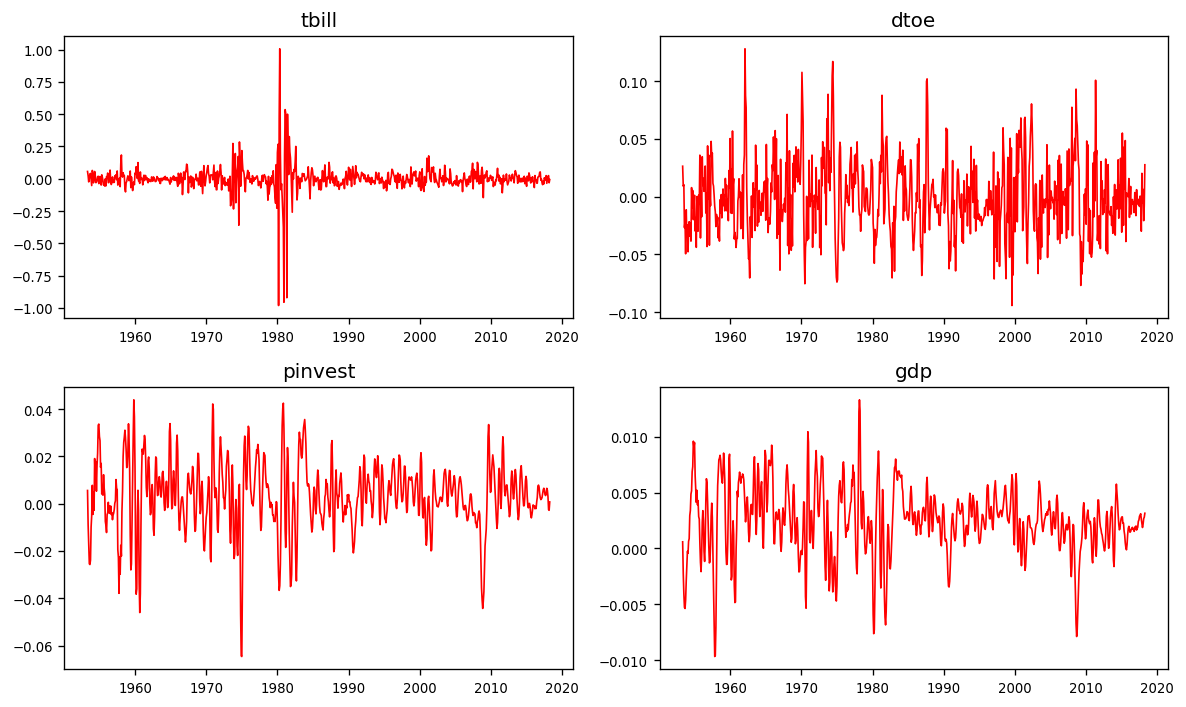

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for col, ax in enumerate(axes.flatten()):
    ax.plot(train_trans[train_trans.columns[col]], color='red', linewidth=1)
    ax.set_title(train_trans.columns[col])
    ax.tick_params(labelsize=8)
    
plt.tight_layout()

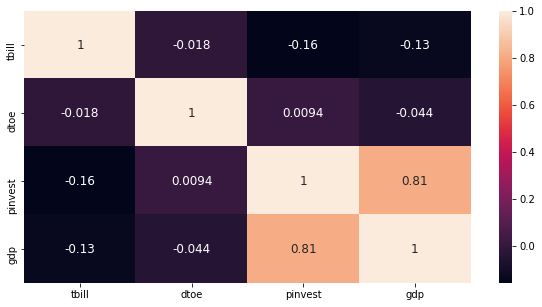

In [25]:
plt.figure(figsize = (10,5))
ax = sb.heatmap(train_trans.corr(), xticklabels=train_trans.columns.values, yticklabels=train_trans.columns.values, annot=True, annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Lag Order Selection

VAR uses 4 metrics for lag order selection: 

* Aikaike Information Criterion (AIC)
* Baysian Information Criteron (BIC) 
* Final Prediction Error (FPE)
* Hannan-Quinn Information Criterion (HQIC)

Not getting into the specific mechanics, these four metrics return the error value. We want the lag orders with the lowest error value. 

AIC has the tendency to chooose large lag order, while BIC has the tendency to choose small lag order. For that reason, the average of AIC and BIC will be used.

In [26]:
train_model = VAR(train_trans)
train_model.select_order(maxlags=36).summary()

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,-32.65,-32.62,6.628e-15,-32.64
1,-35.19,-35.07,5.209e-16,-35.14
2,-36.65,-36.42,1.214e-16,-36.56
3,-37.07,-36.75,7.947e-17,-36.95
4,-37.75,-37.33,4.020e-17,-37.59
5,-38.29,-37.77,2.354e-17,-38.09
6,-38.41,-37.79,2.074e-17,-38.18
7,-38.75,-38.03,1.488e-17,-38.47
8,-38.87,-38.06*,1.309e-17,-38.56*
9,-38.90,-37.98,1.277e-17,-38.55


#### Granger Causality Test

Granger causality is 

Granger causality test assumes there is no relationship between the lag value of x(row) and present value of y(column), if resultant p value is greater than 0.05.

The heat map below indicates all variables have causal relationship with *gdp*, though some input variables have no causal relations to each other. We can ignore this as our interest is on *gdp*.

In [27]:
lag_order = 15

def grangerstest(data, variables, test='ssr_chi2test'):
    res = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in data.columns:
        for r in res.index:
            granger_res = grangercausalitytests(data[[r, c]], maxlag=lag_order, verbose=False)
            p_values = [round(granger_res[i+1][0][test][1],4) for i in range(lag_order)]

            res.loc[r, c] = min(p_values)
    res.columns = [var + '_x' for var in variables]
    res.index = [var + '_y' for var in variables]
    return res

gct = grangerstest(train_trans, variables=train_trans.columns)

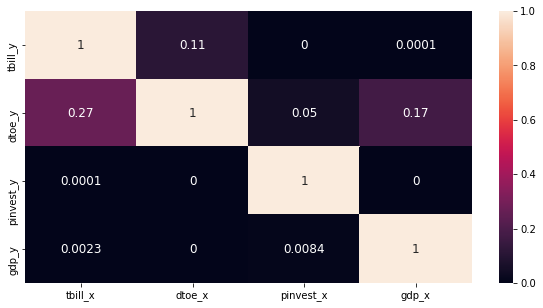

In [28]:
plt.figure(figsize = (10,5))
ax = sb.heatmap(gct, xticklabels=gct.columns.values, yticklabels=gct.index.values, annot=True, annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

#### Cointegreation Test

To verify whether the lag order selected is viable for our model, we can conduct a cointegration test.

Cointegration is simply that, if by applying a transformation variable, or by lagging one variable against another (order of integration), the distance between variables is stationary throughout time. If the variables are cointegrated, that means 

Johansen test combines two series together, than tests whether this combined series has less order of integration than a single variable on its own. If so, then the variables are cointegrated.

Here we pass in 3 variables:
1. data,
2. -1 for stochastic nature of the data,
3. number of lagged periods

The highest lag_order still meeting cointegration criteria is 15, so that is what we will use.

In [29]:
def cointegration_test(data, det_order, lag_order, significance=0.05, ):
    out = coint_johansen(data, det_order, lag_order)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-significance)]]

    def adjust(val, length=6): return str(val).ljust(length)
    print('Name   ::  Test Stat  >  C(95%)    => Signif  \n', '--'*20)
    for col, trace, cvt in zip(data.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace, 2), 9), '> ', adjust(cvt, 8), ' => ', trace > cvt)

cointegration_test(train_trans, det_order=-1, lag_order=lag_order)

Name   ::  Test Stat  >  C(95%)    => Signif  
 ----------------------------------------
tbill  ::  295.22    >  40.1749   =>  True
dtoe   ::  173.12    >  24.2761   =>  True
pinvest ::  82.1      >  12.3212   =>  True
gdp    ::  10.02     >  4.1296    =>  True


*gdp* does not pass the cointegration test, this could have resulted from

#### VAR Model

In [41]:
train_model_fitted = train_model.fit(lag_order)
train_model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 17, Nov, 2019
Time:                     17:41:09
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -38.0390
Nobs:                     772.000    HQIC:                  -38.5280
Log likelihood:           10740.2    FPE:                1.36376e-17
AIC:                     -38.8339    Det(Omega_mle):     1.15351e-17
--------------------------------------------------------------------
Results for equation tbill
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.017942         0.007258            2.472           0.013
L1.tbill           0.072849         0.036706            1.985           0.047
L1.dtoe            0.015093         0.147271            0.102           

#### Check for Residual Correlation with Durbin Watson Test

If our transformation successfully makes the data

Result values can range beween 0 to 4, with 0-2 indicating a positive correlation, and 2-4 indicating negative correlation. It is generally acceptable for values to be between 1.5 to 2.5.

In [31]:
for col, val in zip(train_trans.columns, durbin_watson(train_model_fitted.resid)):
    print((col), ':', round(val, 2))

tbill : 1.99
dtoe : 1.97
pinvest : 2.01
gdp : 2.03


#### Forecasting GDP

In [32]:
train_forecast_input = train_trans.values[-lag_order:]
train_forecast_input

array([[-0.00620478, -0.00435355,  0.00342636,  0.00311078],
       [ 0.0245914 , -0.02995218,  0.00407885,  0.00260633],
       [-0.03501903,  0.02014565,  0.00649255,  0.00223585],
       [-0.0084211 , -0.0057269 ,  0.00569557,  0.0018785 ],
       [ 0.01884873,  0.00628917,  0.00293521,  0.00218533],
       [ 0.0245914 , -0.02083723, -0.00254408,  0.00268912],
       [-0.03083492, -0.00807052, -0.002803  ,  0.00278814],
       [-0.00628274,  0.02760491,  0.00073022,  0.00315652]])

In [33]:
train_forecast = pd.DataFrame(train_model_fitted.forecast(train_forecast_input, test_periods), 
                        index=data_trans.index[-test_periods:], 
                        columns=data_trans.columns)

train_forecast

,tbill,dtoe,pinvest,gdp
date,,,,
2018-05-01,0.011655,0.010289,0.008083,0.003123
2018-06-01,-0.000820,0.022079,0.010650,0.003441
2018-07-01,0.001468,-0.009318,0.010482,0.003197
2018-08-01,-0.027713,0.011729,0.005452,0.003029
2018-09-01,-0.004759,-0.001050,0.002296,0.002422
2018-10-01,0.012130,0.003688,-0.000883,0.002084
2018-11-01,0.008772,-0.005984,-0.000963,0.001897
2018-12-01,0.010916,-0.006169,-0.000908,0.002069
2019-01-01,-0.004984,0.001753,0.000759,0.002358


#### Inverting Transformation

In [34]:
train_forecast_reverse = train_forecast.cumsum() + np.log(train.iloc[-1, :])
train_forecast_reverse = np.exp(train_forecast_reverse)
# forecast['tbill'] -= tbill_trans_var
train_forecast_reverse

,tbill,dtoe,pinvest,gdp
date,,,,
2018-05-01,1.123013,32.921463,3323.326509,18656.300986
2018-06-01,1.122092,33.656433,3358.908902,18720.614606
2018-07-01,1.123741,33.344286,3394.300823,18780.563420
2018-08-01,1.093026,33.737680,3412.856524,18837.530508
2018-09-01,1.087837,33.702282,3420.700713,18883.204088
2018-10-01,1.101112,33.826814,3417.680288,18922.603244
2018-11-01,1.110813,33.624995,3414.388988,18958.534357
2018-12-01,1.123005,33.418191,3411.289680,18997.807451
2019-01-01,1.117422,33.476839,3413.880202,19042.655095


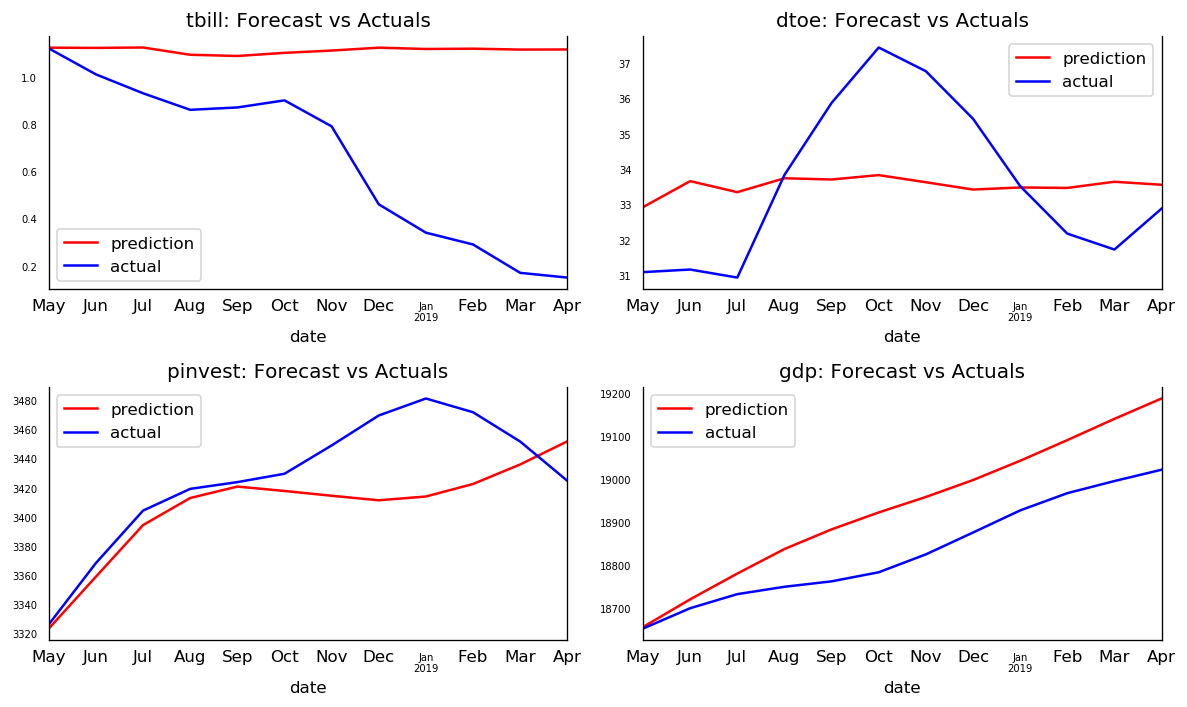

In [35]:
fig, axes = plt.subplots(nrows=int(len(train_forecast_reverse.columns)/2), ncols=2, dpi=120, figsize=(10,6))
for i, (col,ax) in enumerate(zip(train_forecast_reverse.columns, axes.flatten())):
    train_forecast_reverse[col].plot(color='red', label='prediction', legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col].plot(color='blue', label='actual', legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [36]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual) / actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins / maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [37]:
def print_forecast_accuracy(forecast, actual):
    for c in forecast:
        print('Forecast Accuracy of {}'.format(c))
        accuracy_prod = forecast_accuracy(forecast[c].values, actual[c])
        for k, v in accuracy_prod.items():
            print(k, ': ', round(v,4))
        print('\n')

print_forecast_accuracy(forecast=train_forecast_reverse, actual=test)

Forecast Accuracy of tbill
mape :  1.6711
me :  0.4551
mae :  0.4551
mpe :  1.6711
rmse :  0.5665
corr :  -0.2012
minmax :  0.4083


Forecast Accuracy of dtoe
mape :  0.0534
me :  -0.0344
mae :  1.8069
mpe :  0.003
rmse :  2.0983
corr :  0.5408
minmax :  0.0517


Forecast Accuracy of pinvest
mape :  0.0071
me :  -20.0844
mae :  24.5925
mpe :  -0.0058
rmse :  32.7508
corr :  0.7976
minmax :  0.0071


Forecast Accuracy of gdp
mape :  0.0054
me :  101.9776
mae :  101.9776
mpe :  0.0054
rmse :  113.2175
corr :  0.983
minmax :  0.0054




#### Actual Forecast

In [38]:
model = VAR(data_trans)
model_fitted = train_model.fit(lag_order)

forecast = pd.DataFrame(train_model_fitted.forecast(data_trans.values[-lag_order:], test_periods), 
                        index=data_trans.index[-test_periods:],
                        columns=data_trans.columns)
forecast_reverse = forecast.cumsum() + np.log(data.iloc[-1, :])
forecast_reverse = np.exp(forecast_reverse)

forecast_reverse.index = pd.date_range(pd.to_datetime('2019, 05, 1'), pd.to_datetime('2020, 04, 1'), freq='MS')
forecast_reverse

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,tbill,dtoe,pinvest,gdp
2019-05-01,0.155008,33.870742,3406.226722,19052.977231
2019-06-01,0.159819,35.089183,3395.229597,19093.848547
2019-07-01,0.159186,35.491295,3400.535733,19138.424286
2019-08-01,0.156221,36.020419,3414.514844,19185.000798
2019-09-01,0.155505,36.079468,3436.112019,19229.266252
2019-10-01,0.156978,35.915445,3451.546326,19272.940636
2019-11-01,0.157612,35.500854,3458.239245,19315.409671
2019-12-01,0.158392,35.049676,3453.023131,19356.836782
2020-01-01,0.159167,34.878119,3443.176788,19396.676449
2020-02-01,0.161544,34.730990,3435.269376,19435.038354


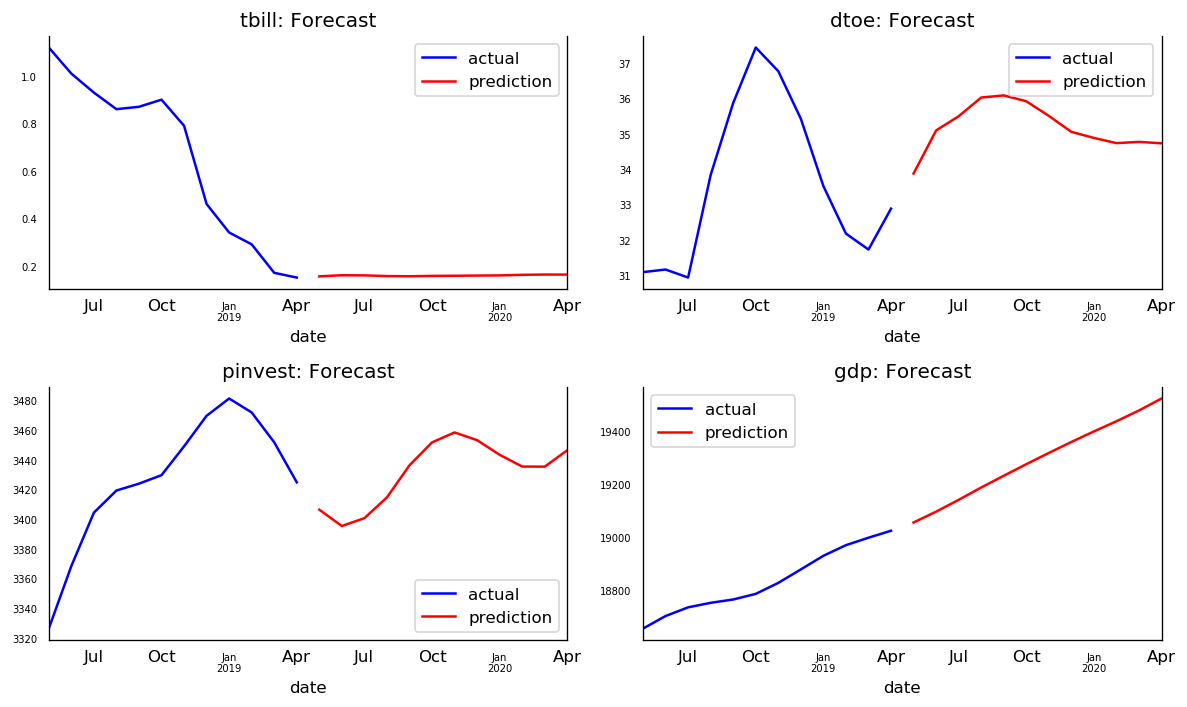

In [39]:
fig, axes = plt.subplots(nrows=int(len(forecast_reverse.columns)/2), ncols=2, dpi=120, figsize=(10,6))
for i, (col,ax) in enumerate(zip(forecast_reverse.columns, axes.flatten())):
    test[col].plot(color='blue', label='actual', legend=True, ax=ax)
    forecast_reverse[col].plot(color='red', label='prediction', legend=True, ax=ax).autoscale(axis='x',tight=True);
    ax.set_title(col + ": Forecast")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

## Findings

## Limitations

This predictor does not pinpoint the cause of a recession, but makes a general comment about the state of the economy. The underlying assumption is that these inputs are efficient enough to reflect long term market conditions, but inefficient enough to price in the short term fluctuations in GDP.

When trying to quantify debt as percentage of equity, it turned out that noncoporate entities 

## Closing Thoughts

Special thanks to Mortada Mehyar for creating fredapi. This saves some time from having to deal with JSON format.

## Part 2

#### Data Preparation

Let's set up recession decision variable. Difficulty joining series, so had to convert to list, append, then reconvert to series.

In [40]:
# Create a DataFrame for recession
start_date = pd.to_datetime('1951, 10, 1')
end_date = pd.to_datetime('today')
recessions = pd.date_range(start_date, end_date, freq='MS')
recessions = recessions.to_frame().reset_index()

# Mark recession months as 1, non-recession months as 0
recessions.iloc[:,1] = 0
recessions.loc[recessions.iloc[:,0].isin(recession_months), 0] = 1
recessions.rename(columns={'index':'date', 0:'recession'}, inplace=True)

# possible to create lambda variables?

r_1953 = pd.Series(pd.date_range(pd.to_datetime('1953, 3, 1'), pd.to_datetime('1954, 5, 1'))).tolist()
r_1957 = pd.Series(pd.date_range(pd.to_datetime('1957, 8, 1'), pd.to_datetime('1958, 4, 1'))).tolist()
r_1960 = pd.Series(pd.date_range(pd.to_datetime('1960, 4, 1'), pd.to_datetime('1961, 2, 1'))).tolist()
r_1962 = pd.Series(pd.date_range(pd.to_datetime('1969, 12, 1'), pd.to_datetime('1970, 11, 1'))).tolist()
r_1973 = pd.Series(pd.date_range(pd.to_datetime('1973, 11, 1'), pd.to_datetime('1975, 3, 1'))).tolist()
r_1980 = pd.Series(pd.date_range(pd.to_datetime('1980, 1, 1'), pd.to_datetime('1980, 7, 1'))).tolist()
r_1981 = pd.Series(pd.date_range(pd.to_datetime('1981, 7, 1'), pd.to_datetime('1982, 11, 1'))).tolist()
r_1990 = pd.Series(pd.date_range(pd.to_datetime('1990, 7, 1'), pd.to_datetime('1991, 3, 1'))).tolist()
r_2001 = pd.Series(pd.date_range(pd.to_datetime('2001, 3, 1'), pd.to_datetime('2001, 11, 1'))).tolist()
r_2007 = pd.Series(pd.date_range(pd.to_datetime('2007, 12, 1'), pd.to_datetime('2009, 6, 1'))).tolist()

print('Original series length:', len(r_1953))

recession_months = pd.Series(r_1953 + r_1957 + r_1960 + r_1962 + r_1973 + r_1980 + r_1981 + r_1990 + r_2001 + r_2007)

print('Verify series was appended:', len(recession_months))

recessions.iloc[15:20]

NameError: name 'recession_months' is not defined